In [2]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv("/content/drive/My Drive/Deep Learning/fashion-mnist_train.csv")
test = pd.read_csv("/content/drive/My Drive/Deep Learning/fashion-mnist_test.csv")

In [5]:
#Define the target and the features
x_train = train.drop(columns=['label'])
y_train = train.label

x_test = test.drop(columns=['label'])
y_test = test.label

In [6]:
#Print the shape of target
y_train.shape , y_test.shape

((60000,), (10000,))

In [7]:
#Print the number of class in the train target
list(y_train.unique())

[2, 9, 6, 0, 3, 4, 5, 8, 7, 1]

In [8]:
#Print the number of class in the test target
list(y_test.unique())

[0, 1, 2, 3, 8, 6, 5, 4, 7, 9]

In [9]:
x_train.max().sort_values().tail(1)

pixel392    255
dtype: int64

In [10]:
x_test.max().sort_values().tail(1)

pixel396    255
dtype: int64

In [11]:
#The max number is 255, so lets divide the target by this number
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train = x_train.astype(float) 
x_test = x_test.astype(float)

In [13]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,10) #10 levels of image
y_test =  to_categorical(y_test,10) #10 levels of image

In [14]:
#Starting a neural network
modelo = Sequential()

#Input the first layer in model with 50 neurals and the activation function will be Relu
modelo.add(Dense(50 #number os neurals
                ,activation = 'relu' #activation function
                ,input_shape = (784,) #Number of features in dataframe, let's pay attention, because keras need to receive a tuple, its the reason of (784,0)
                ,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)
                ))

#Input the second layer in model with 50 neurals and the same activation function
modelo.add(Dense(30 
                ,activation = 'relu' 
                ,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) 
                ))

#Input the third layer in model with 20 neurals and the same activation function
modelo.add(Dense(20
                ,activation = 'relu' 
                ,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) 
                ))

#The final layes will be with 10 neurals because we have 10 class in this dataframe
#The activation function is softmax because its will be normalize the output of neurals and it will be easier identify the probably of each class
modelo.add(Dense(10 #numero de classs
                ,activation = 'softmax' #Vai normaliza as probabilidades por exponencial
                ))

#Finally, lets see the summary of the model and see how many parameters its have.
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 41,610
Trainable params: 41,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
modelo.compile(
                loss='categorical_crossentropy' 
               ,optimizer='adam' 
               ,metrics=['accuracy'] )

In [16]:
history = modelo.fit(x_train,y_train
         ,epochs=30 #number of times that model will through in train 
         ,batch_size = 128 #number of rows that will be consider to update the weights of layers
         ,verbose = 1
         ,validation_data=(x_test,y_test)
         )

Epoch 1/30
469/469 [==============================] - 2s 5ms/step - loss: 1.3896 - accuracy: 0.7256 - val_loss: 0.9584 - val_accuracy: 0.8058
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.9144 - accuracy: 0.8052 - val_loss: 0.8604 - val_accuracy: 0.8178
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.8462 - accuracy: 0.8134 - val_loss: 0.8239 - val_accuracy: 0.8162
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.8114 - accuracy: 0.8162 - val_loss: 0.7947 - val_accuracy: 0.8202
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.7835 - accuracy: 0.8199 - val_loss: 0.7730 - val_accuracy: 0.8219
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.7569 - accuracy: 0.8228 - val_loss: 0.7562 - val_accuracy: 0.8256
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.7387 - accuracy: 0.8260 - val_loss: 0.7334 - val_accuracy: 0.8282
Epoch 

In [17]:
modelo.evaluate(x_test,y_test,verbose = 0)

[0.6766837239265442, 0.8036999702453613]

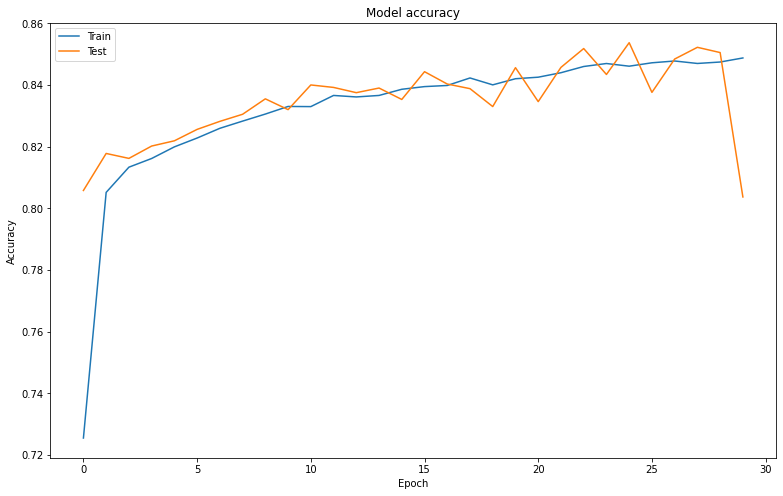

In [18]:
plt.subplots(figsize=(13, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

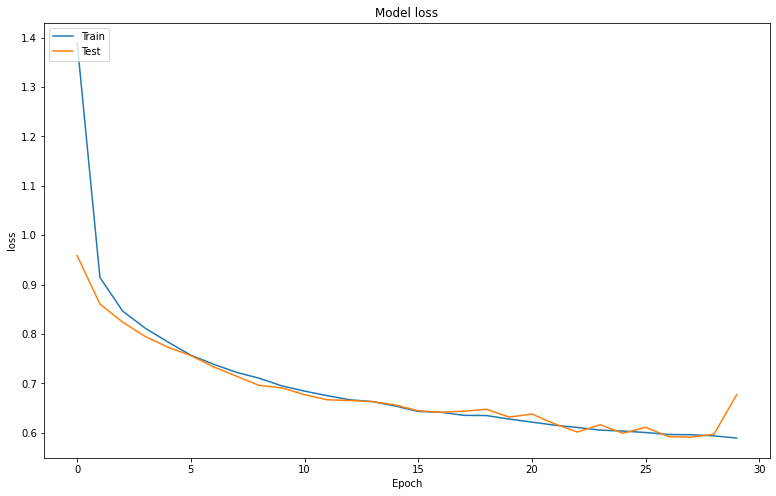

In [19]:
plt.subplots(figsize=(13, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
#Predict the x_test
p = modelo.predict(x_test)
p = (p > 0.5)
print('ACC: %.3f%%' % (accuracy_score(y_test, p)*100))
print('---------')
print(classification_report(y_test, p))

ACC: 76.480%
---------
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1000
           1       0.99      0.93      0.96      1000
           2       0.74      0.74      0.74      1000
           3       0.86      0.86      0.86      1000
           4       0.89      0.24      0.38      1000
           5       0.88      0.95      0.91      1000
           6       0.53      0.63      0.58      1000
           7       0.95      0.81      0.87      1000
           8       0.98      0.84      0.90      1000
           9       0.89      0.94      0.91      1000

   micro avg       0.84      0.76      0.80     10000
   macro avg       0.86      0.76      0.79     10000
weighted avg       0.86      0.76      0.79     10000
 samples avg       0.76      0.76      0.76     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,30,20) #define 3 layers with 50, 30 and 20 neurals
                      , batch_size=32 #Define the same bacth_size
                      , solver = 'adam' #Define the optimization
                      ,activation='relu' #Activation function
                      , max_iter=30 #Number of epochs
                      ,verbose=1
                      , random_state=42)

model.fit(x_train, y_train)

Iteration 1, loss = 1.16751323
Iteration 2, loss = 0.73055040
Iteration 3, loss = 0.66297888
Iteration 4, loss = 0.62398755
Iteration 5, loss = 0.59599158
Iteration 6, loss = 0.57648485
Iteration 7, loss = 0.55670148
Iteration 8, loss = 0.53980763
Iteration 9, loss = 0.52693651
Iteration 10, loss = 0.51314798
Iteration 11, loss = 0.50228346
Iteration 12, loss = 0.49314415
Iteration 13, loss = 0.48015815
Iteration 14, loss = 0.47619853
Iteration 15, loss = 0.46789987
Iteration 16, loss = 0.46192088
Iteration 17, loss = 0.45247878
Iteration 18, loss = 0.44406509
Iteration 19, loss = 0.43771446
Iteration 20, loss = 0.43211326
Iteration 21, loss = 0.42776855
Iteration 22, loss = 0.41946926
Iteration 23, loss = 0.41856413
Iteration 24, loss = 0.41319356
Iteration 25, loss = 0.40686743
Iteration 26, loss = 0.40019588
Iteration 27, loss = 0.39966402
Iteration 28, loss = 0.39747053
Iteration 29, loss = 0.39105230
Iteration 30, loss = 0.38643915


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=30,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [22]:
#Print the accuracy
print('Accuracy:', model.score(x_test, y_test))

Accuracy: 0.8652


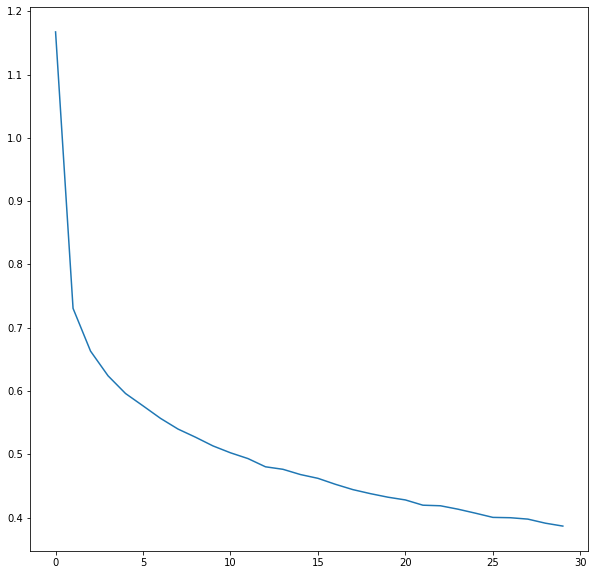

In [23]:
plt.rcParams['figure.figsize'] = 10, 10

plt.plot(list(range(len(model.loss_curve_))), model.loss_curve_)

In [25]:
#Predict the x_test
p = model.predict(x_test)
p = (p > 0.5)
print('ACC: %.3f%%' % (accuracy_score(y_test, p)*100))
print('---------')
print(classification_report(y_test, p))

ACC: 86.520%
---------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.79      0.83      1000
           3       0.94      0.86      0.90      1000
           4       0.88      0.77      0.82      1000
           5       0.98      0.92      0.95      1000
           6       0.69      0.73      0.71      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.91      0.97      0.94      1000

   micro avg       0.90      0.87      0.88     10000
   macro avg       0.90      0.87      0.88     10000
weighted avg       0.90      0.87      0.88     10000
 samples avg       0.87      0.87      0.87     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
